<a href="https://colab.research.google.com/github/eyaguirat10/Crispdm_workshop/blob/main/_crispdm_wine_ensemble_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Business Understanding**

1. Supervised
Problem Statement:

Wine quality assessment still relies heavily on human tasting — a costly, slow, and subjective process. This variability complicates quality control and product standardization. The goal is therefore to develop a model capable of automatically predicting wine quality based on its physicochemical properties measurable in the laboratory.

BO (Business Objective):

Automate wine quality prediction in order to improve quality control consistency, accelerate production decisions, and reduce dependence on subjective human evaluations.

DSO (Data Science Objective):

Build a supervised decision tree model to predict the wine quality score (variable quality).

Initial Suggested Model:

Decision Tree

Evaluation Metrics:

RMSE (Root Mean Squared Error)

MAE (Mean Absolute Error)

R² (Coefficient of Determination)

Success Criteria:

The project will be considered successful if the model can predict wine quality with an average error below 0.5 points, while remaining interpretable through tree visualization and identifying the most influential features (e.g., alcohol, volatile acidity, sulfur dioxide).

Stakeholders:

Quality Managers: use the predictions to validate or adjust production batches.

Oenologists: rely on key variables to understand product improvement levers.

Production Management: uses the predictions to plan batches according to anticipated quality.

2. Unsupervised – Binary Segmentation (k = 2)
Problem Statement:

Producers currently lack an automated tool to quickly distinguish between wines of acceptable quality and those requiring adjustments. This gap complicates batch management and delays decision-making.

BO (Business Objective):

Implement a simple segmentation of wines into two main categories (“good” and “bad”) to facilitate operational decision-making.

DSO (Data Science Objective):

Apply clustering methods (e.g., K-Means with k = 2) to identify two natural groups of wines based on their chemical variables.

Initial Suggested Model:

K-Means Clustering (k = 2)

Evaluation Metrics:

Silhouette Score

Calinski-Harabasz Index

PCA Visualization

Success Criteria:

The project will be successful if the identified clusters show clear and interpretable separation in terms of chemical characteristics and average observed quality.

Stakeholders:

Production Managers: quickly classify wines according to their quality level.

Quality Analysts: monitor batch distribution and optimize production processes.

3. Unsupervised – Multiple Segmentation (k ≤ 5–6)
Problem Statement:

A binary segmentation cannot capture the full diversity of wine profiles. Producers wish to uncover more detailed typologies to adapt recipes, pricing, and market targeting.

BO (Business Objective):

Identify distinct wine profiles to guide production, formulation, and marketing positioning.

DSO (Data Science Objective):

Apply unsupervised clustering methods (K-Means) with between 3 and 6 clusters to reveal coherent chemical profiles.

Initial Suggested Model:

K-Means, Agglomerative Hierarchical Clustering, DBSCAN.

Evaluation Metrics:

Silhouette Score

Davies-Bouldin Index

PCA Visualization

Success Criteria:

The project will be successful if the identified segments are stable, well-separated, and interpretable based on chemical features (e.g., “high alcohol,” “acidic and light,” “balanced”).

Stakeholders:

Oenologists: adjust winemaking processes according to the detected profiles.

Marketing Department: designs product lines adapted to each profile.

Sales Management: uses typologies to target different markets.

# **II. Data Understanding**


## 1) Quick setup and imports

Run this cell to install any missing packages (only needed in some environments). The code includes safe `try/except` blocks so it works both in local machines and Colab.

In [4]:
# Install packages if running in a fresh environment (uncomment if needed)
# !pip install xgboost lightgbm scikit-learn pandas matplotlib seaborn

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Try importing xgboost (optional)
import xgboost as xgb


## 2) Load dataset (UCI Wine Quality — red)

We will download the `winequality-red.csv` directly from the UCI repository.

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
print('Shape:', df.shape)
df.head()

Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3) Exploratory data analysis (brief)
- Show basic statistics
- Plot distribution of target (quality)
- Create a binary classification target: `good` (quality >=7) vs `bad` (<7) for classification exercises

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


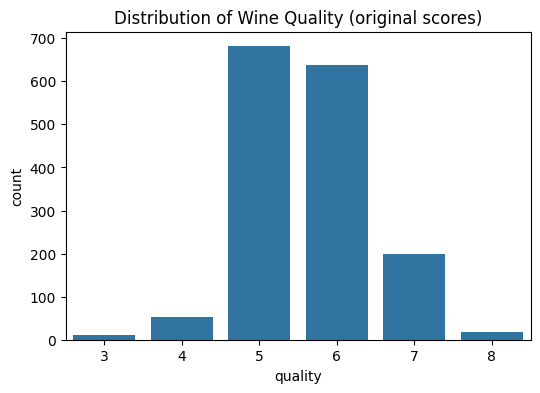

Counts (good=1):
quality_label
0    1382
1     217
Name: count, dtype: int64


In [6]:
# Basic stats
display(df.describe())

# Distribution of quality
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality (original scores)')
plt.show()

# Binary target for classification
df['quality_label'] = (df['quality'] >= 7).astype(int)  # 1 -> good, 0 -> not good
print('Counts (good=1):')
print(df['quality_label'].value_counts())

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


We can see that there are no missing values (count = 1599 for all columns). Some features like residual sugar, total sulfur dioxide, and alcohol show high variability, which may indicate outliers. Most wines have a quality score between 5 and 6 (median = 6). Alcohol ranges widely (from 8.4 to 14.9), which could influence quality. The quality_label variable is imbalanced, with many more 0s than 1s.

The interquartile range (Q3 - Q1) is small for most features, like density and pH, meaning most values are close together. For others like alcohol and total sulfur dioxide, the IQR is larger, so values are more spread out in the middle 50% of the data.

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

##4) Data Types & Missing Values

In [9]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


No missing values — all columns are complete.

In [10]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


##5) Detecting Outliers

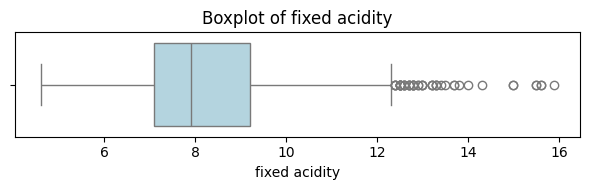

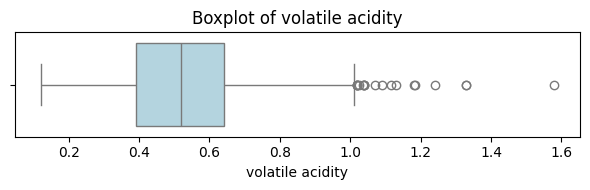

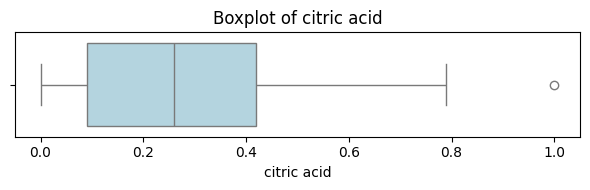

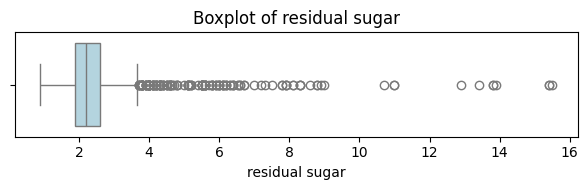

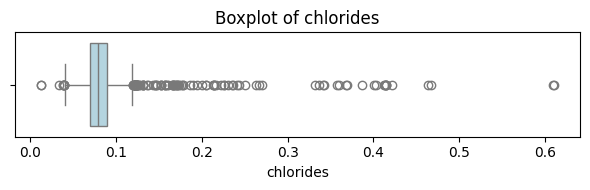

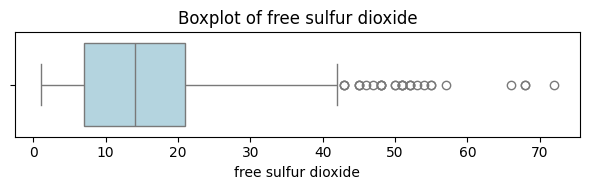

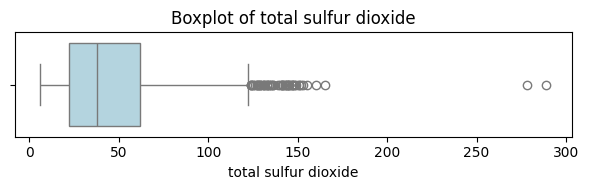

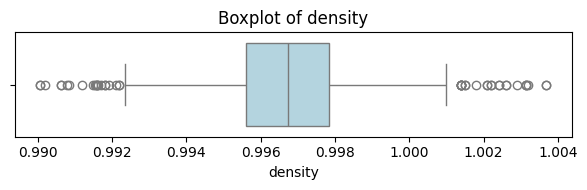

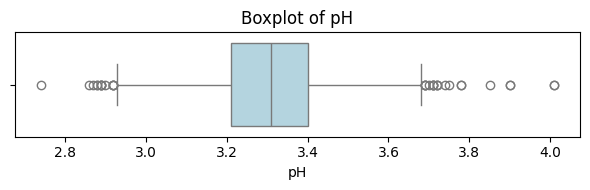

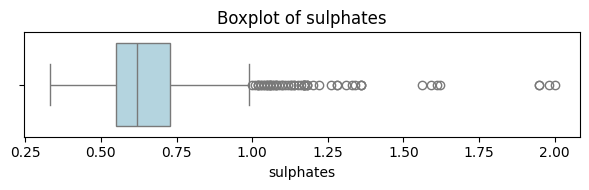

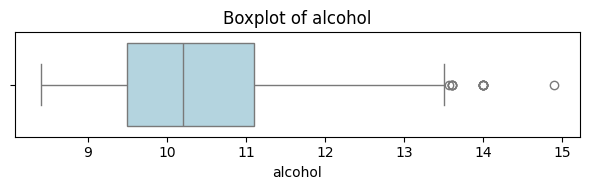

In [11]:
numeric_cols = df.drop(columns=['quality', 'quality_label']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


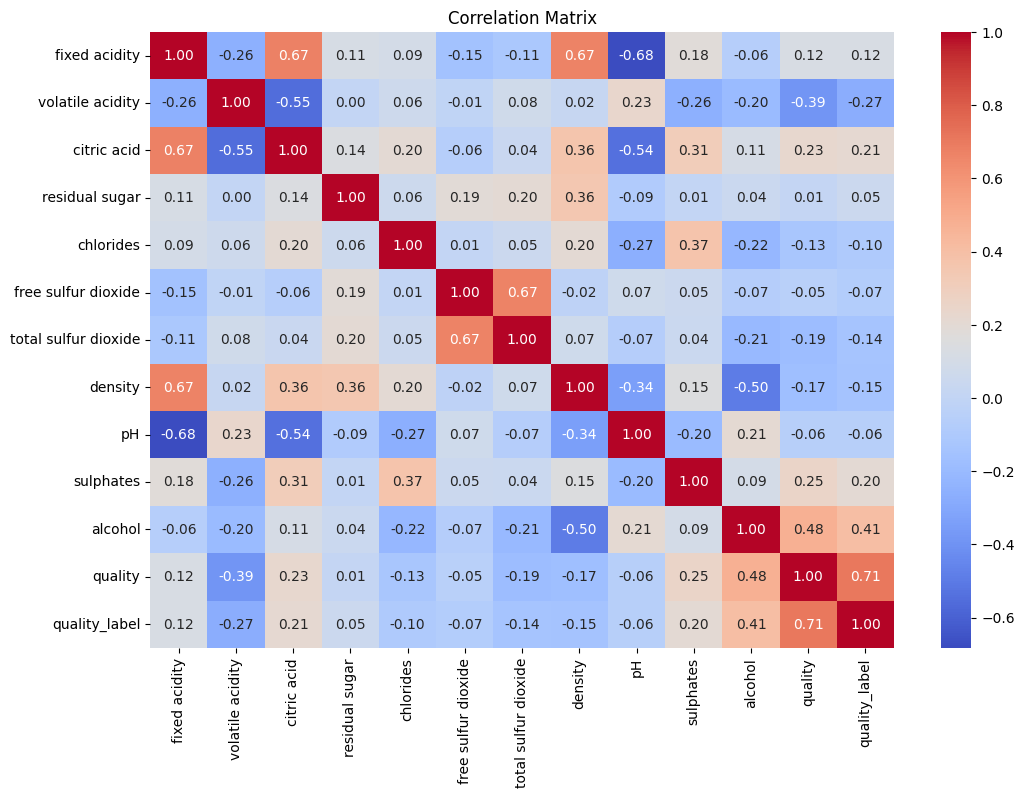

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

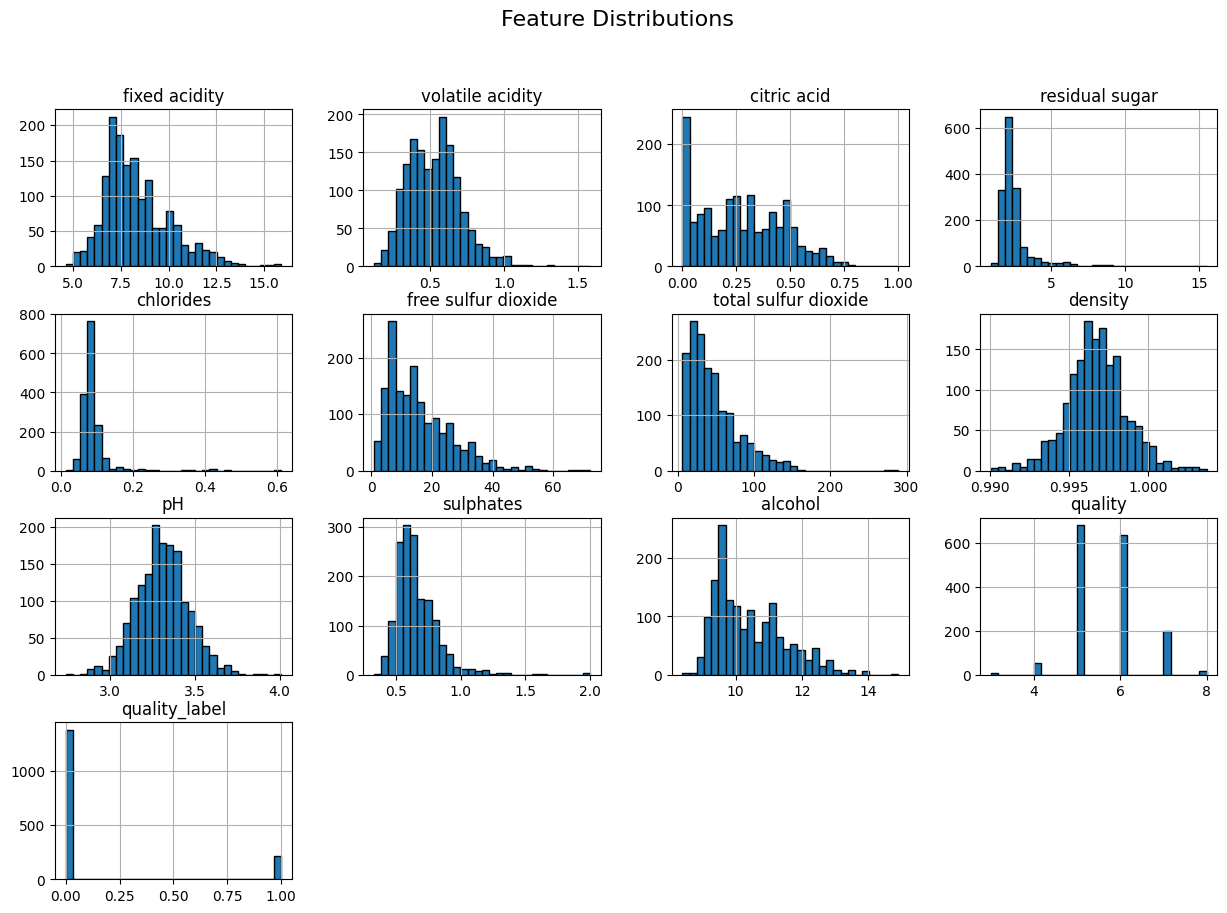

In [13]:
df.hist(bins=30, figsize=(15,10), layout=(4,4), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

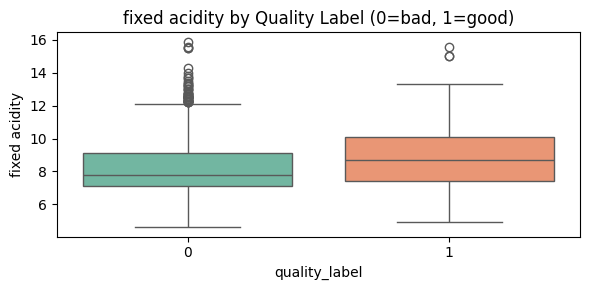

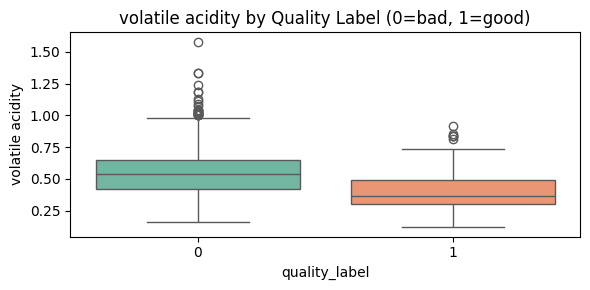

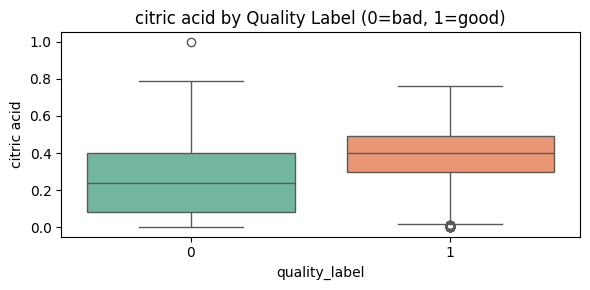

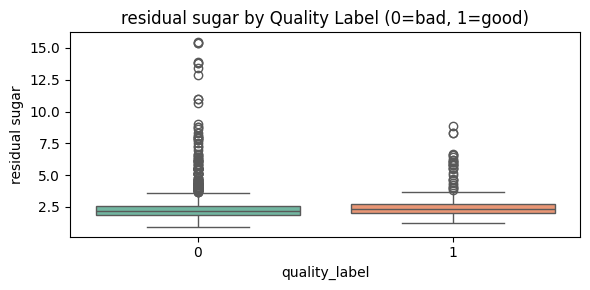

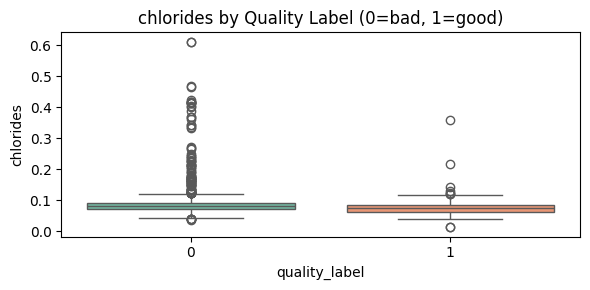

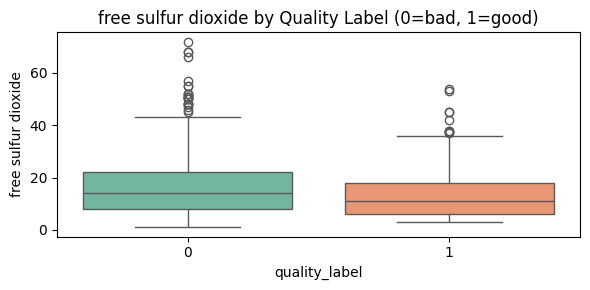

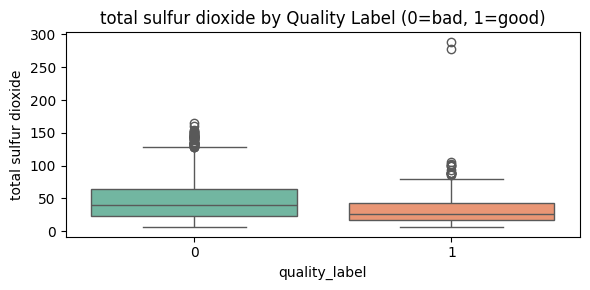

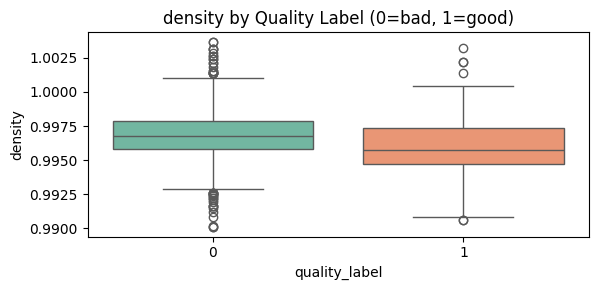

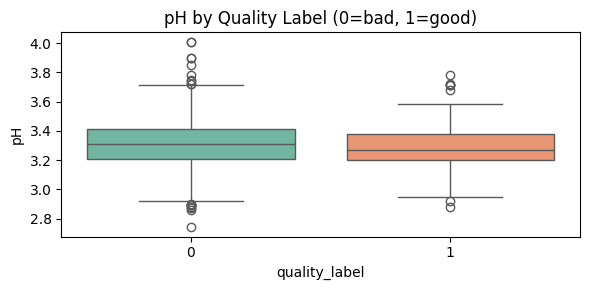

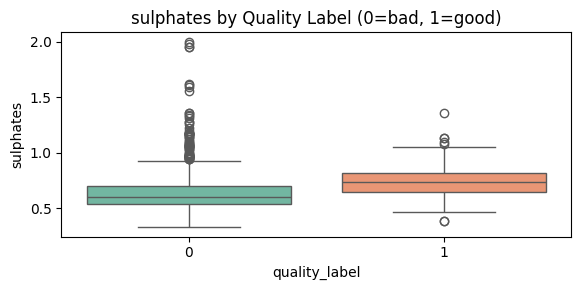

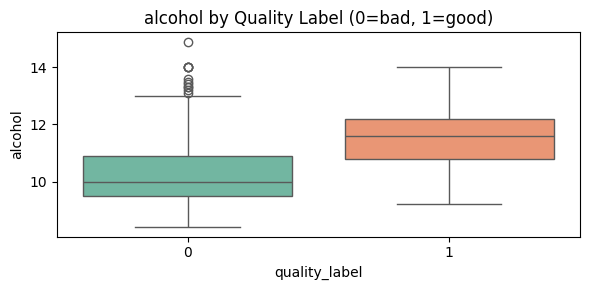

In [14]:
for col in df.drop(columns=['quality', 'quality_label']).columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='quality_label', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Quality Label (0=bad, 1=good)')
    plt.tight_layout()
    plt.show()

In [15]:
df.drop(columns=['quality', 'quality_label']).describe().T[['min', 'max']]

,min,max
fixed acidity,4.60000,15.90000
volatile acidity,0.12000,1.58000
citric acid,0.00000,1.00000
residual sugar,0.90000,15.50000
chlorides,0.01200,0.61100
free sulfur dioxide,1.00000,72.00000
total sulfur dioxide,6.00000,289.00000
density,0.99007,1.00369
pH,2.74000,4.01000
sulphates,0.33000,2.00000


In [16]:
df.duplicated().sum()

np.int64(240)

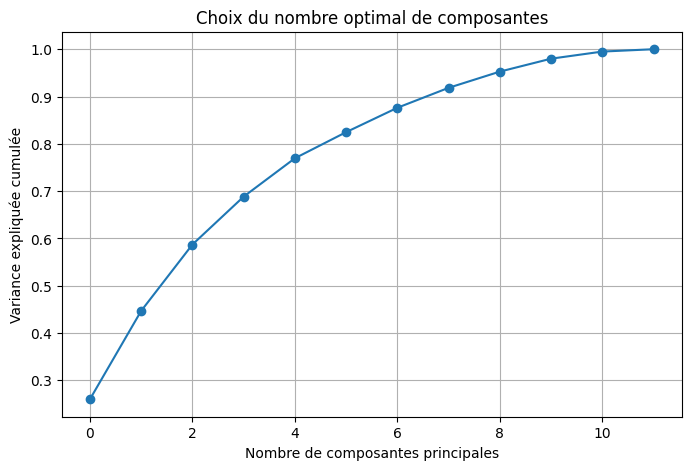

Variance expliquée par chaque composante :
[0.26009731 0.1868235  0.14024331 0.10125174 0.0811053  0.05521602
 0.05152648 0.04215605 0.03427563 0.02732662 0.01501822 0.00495983]


In [17]:
from sklearn.decomposition import PCA

# 1) Séparation des variables explicatives
X = df.drop(['quality_label'], axis=1)

# 2) Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Application de la PCA
pca = PCA(n_components=None)  # garde toutes les composantes
X_pca = pca.fit_transform(X_scaled)

# 4) Visualisation de la variance expliquée
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Choix du nombre optimal de composantes')
plt.grid(True)
plt.show()

# 5) Résumé
print('Variance expliquée par chaque composante :')
print(pca.explained_variance_ratio_)


--- Analyse de la Variance ---
Variance expliquée par composante : [0.26009731 0.1868235  0.14024331]
Variance cumulée : [0.26009731 0.44692081 0.58716412]

--- Tableau de Contribution des Variables (Cos²) ---


,PC1_contrib,PC2_contrib,PC3_contrib,Qualité_Rep_PC1_PC2
alcohol,0.54%,25.27%,5.06%,25.81%
density,13.71%,10.94%,2.85%,24.65%
citric acid,22.40%,1.89%,1.00%,24.29%
fixed acidity,23.80%,0.00%,2.72%,23.80%
quality,1.27%,22.39%,4.99%,23.65%
pH,18.72%,0.43%,0.49%,19.15%
volatile acidity,7.03%,11.49%,5.16%,18.52%
total sulfur dioxide,0.00%,13.25%,29.24%,13.25%
sulphates,6.48%,1.20%,4.53%,7.67%
chlorides,3.90%,3.60%,0.07%,7.50%



--- Affichage du Cercle des Corrélations (PC1 vs PC2) ---


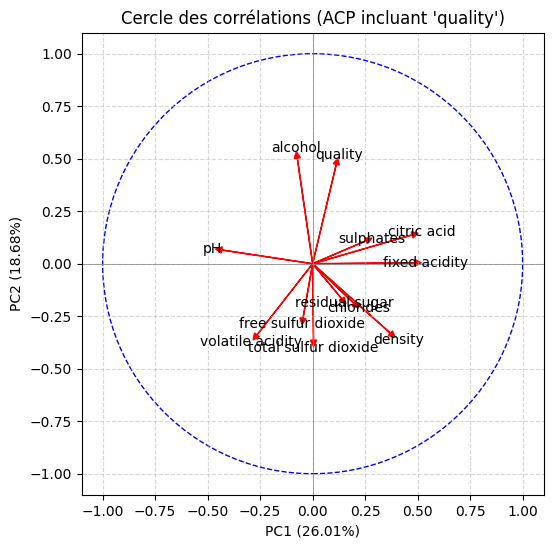

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Importation nécessaire pour un affichage "joli" du tableau dans un notebook
try:
    from IPython.display import display
except ImportError:
    # Si 'display' n'est pas disponible (ex: script simple),
    # on le remplace par 'print'
    display = print

# --- 1. PRÉPARATION DES DONNÉES ET ACP ---

# ASSUREZ-VOUS QUE VOTRE DATAFRAME 'df' EST CHARGÉ AVANT CETTE LIGNE
# Exemple : df = pd.read_csv('votre_fichier.csv')

# Inclure 'quality', exclure 'quality_label'
X = df.drop(['quality_label'], axis=1)
feature_names = X.columns # On sauvegarde les noms ici

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ACP avec 3 composantes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("--- Analyse de la Variance ---")
print(f"Variance expliquée par composante : {pca.explained_variance_ratio_}")
print(f"Variance cumulée : {np.cumsum(pca.explained_variance_ratio_)}")


# --- 2. TABLEAU DE CONTRIBUTION (Cos²) ---

print("\n--- Tableau de Contribution des Variables (Cos²) ---")

# Calculer les contributions (carré des loadings/coordonnées = cos²)
contributions_sq = pca.components_**2

# Créer un DataFrame pandas pour un affichage clair
contrib_df = pd.DataFrame(
    contributions_sq.T, # Transposer pour avoir les variables en lignes
    columns=[f'PC{i+1}_contrib' for i in range(pca.n_components_)],
    index=feature_names
)

# Ajouter la Qualité de la représentation sur le plan PC1+PC2
contrib_df['Qualité_Rep_PC1_PC2'] = contrib_df['PC1_contrib'] + contrib_df['PC2_contrib']

# Trier le DataFrame par les variables les mieux représentées sur le plan
contrib_df_sorted = contrib_df.sort_values(by='Qualité_Rep_PC1_PC2', ascending=False)

# Afficher le tableau formaté en pourcentages
# 'display' est préférable à 'print' dans un notebook (Jupyter, Colab)
display(contrib_df_sorted.style.format('{:.2%}'))


# --- 3. CERCLE DES CORRÉLATIONS ---

print("\n--- Affichage du Cercle des Corrélations (PC1 vs PC2) ---")

# Récupérer les composantes (loadings)
pcs = pca.components_
fig, ax = plt.subplots(figsize=(6,6))

for i, col in enumerate(feature_names): # Utilise la variable feature_names
    ax.arrow(0, 0, pcs[0, i], pcs[1, i],
             head_width=0.03, head_length=0.03, fc='red', ec='red')
    ax.text(pcs[0, i]*1.1, pcs[1, i]*1.1, col, ha='center', va='center')

# Cercle unité
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', linestyle='--')
ax.add_artist(circle)

# Configuration du graphique
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title("Cercle des corrélations (ACP incluant 'quality')")
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box') # Assure que le cercle est rond

# Afficher le graphique
plt.show()

D’après le cercle des corrélations et le tableau des contributions, on peut identifier quelles variables influencent le plus la qualité du vin.

Les variables alcohol, citric acid, fixed acidity et sulphates pointent dans la même direction que la variable quality, ce qui indique une corrélation positive : plus ces valeurs sont élevées, plus la qualité du vin tend à être bonne. Par exemple, alcohol a une contribution importante sur PC2 (25.27 %) et est bien alignée avec quality, ce qui confirme que les vins avec un degré d’alcool plus élevé sont généralement mieux notés.

À l’inverse, des variables comme density, residual sugar, total sulfur dioxide ou volatile acidity sont orientées à l’opposé de quality, donc corrélées négativement à la qualité. Cela signifie que des valeurs élevées de ces variables sont souvent associées à des vins de moins bonne qualité.

Certaines variables comme pH sont très proches du centre du cercle et mal représentées sur les deux premiers axes. Leur influence sur la qualité n’est donc pas claire dans cette projection.

En résumé, l’ACP nous aide à mieux visualiser quelles caractéristiques physico-chimiques du vin sont liées à sa qualité. Elle confirme que des niveaux plus élevés d’alcool et d’acidité (fixe et citrique) sont souvent associés à de meilleurs vins, tandis que le sucre résiduel, la densité et le soufre peuvent avoir un effet négatif.


*   alcohol
*   volatile acidity
*   residual sugar
*   total sulfur dioxide
*   free sulfur dioxide


# **III. Data Preparation**


In [20]:
df_duplicate = df.copy()
df_duplicate = df_duplicate.drop_duplicates()
df_duplicate.duplicated().sum()

np.int64(0)

In [21]:
# Create a clean copy before removing
df_outliers = df_duplicate.copy()

# Exclude target columns from the cleaning
features = df_outliers.drop(columns=['quality', 'quality_label']).columns

# Apply IQR filtering feature by feature
for col in features:
    Q1 = df_outliers[col].quantile(0.25)
    Q3 = df_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outliers = df_outliers[(df_outliers[col] >= lower_bound) & (df_outliers[col] <= upper_bound)]

print("New shape after outlier removal:", df_outliers.shape)


New shape after outlier removal: (985, 13)


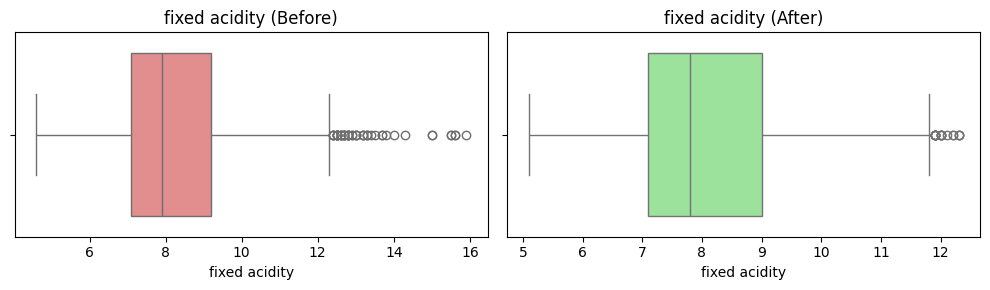

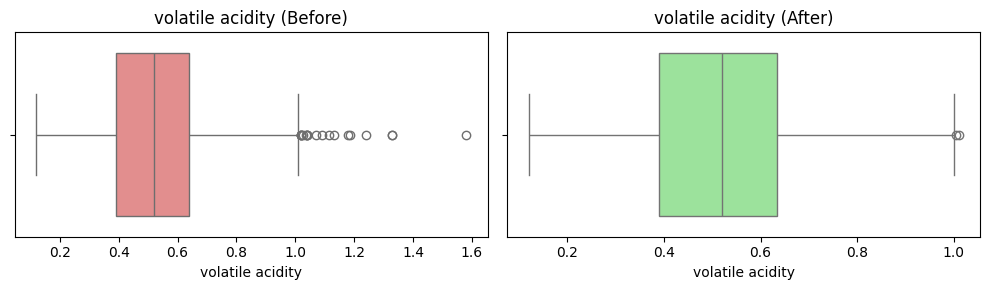

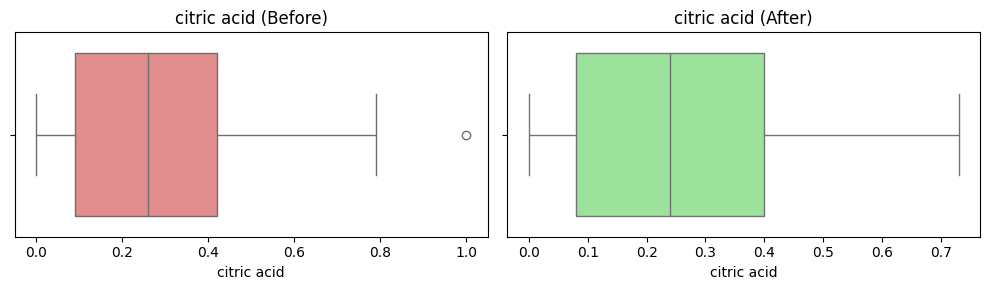

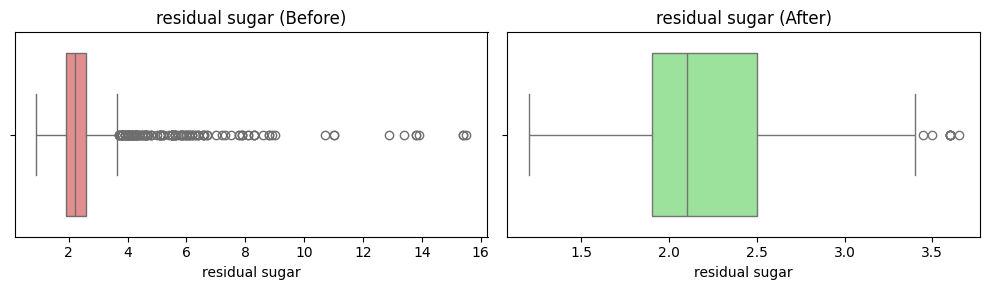

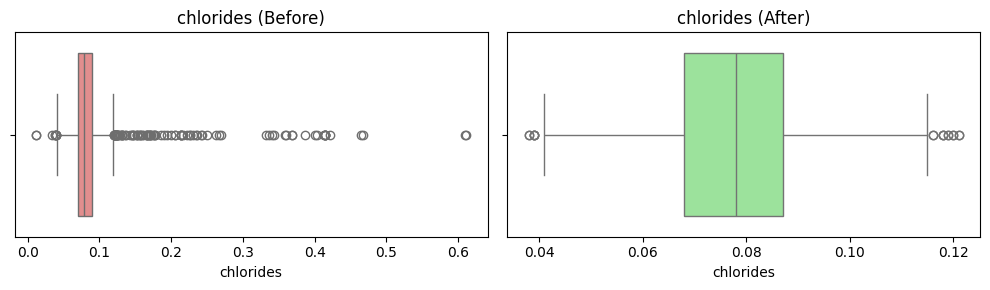

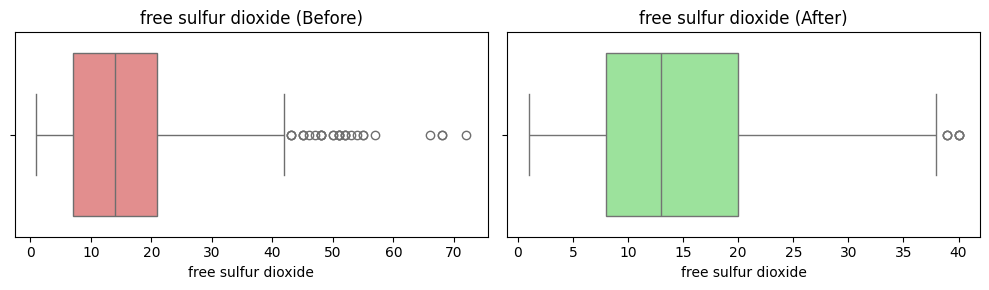

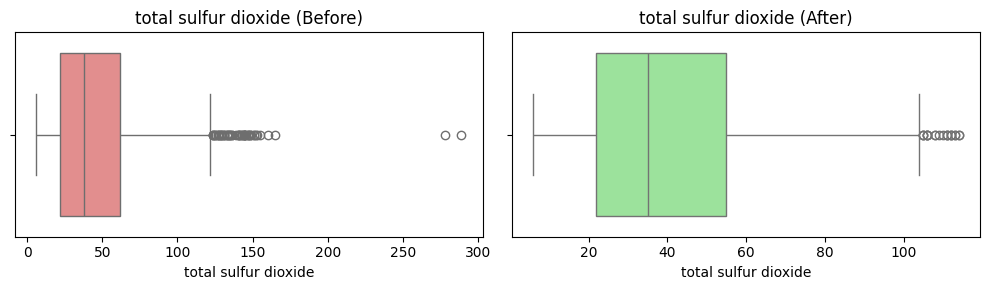

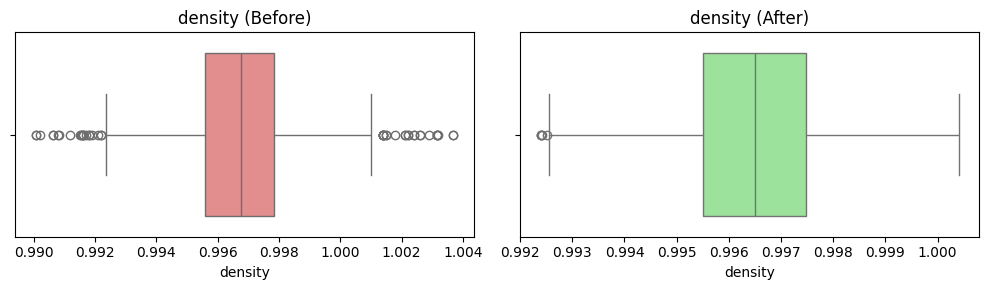

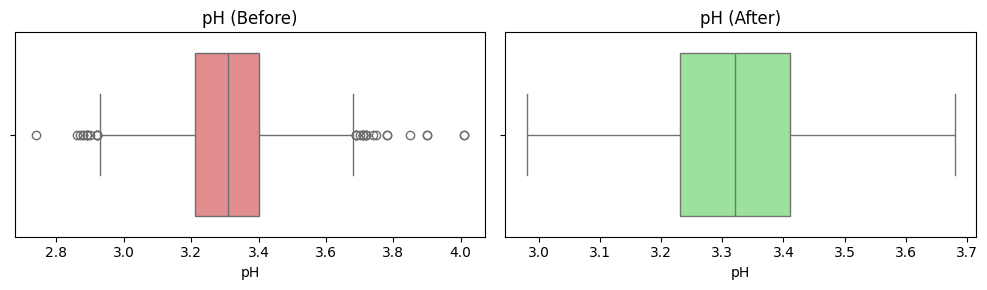

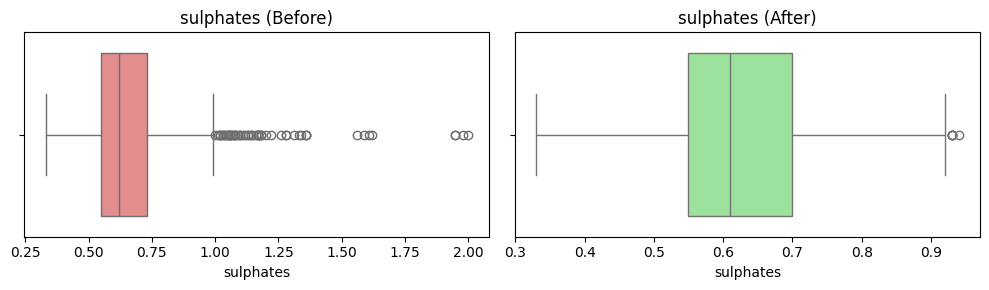

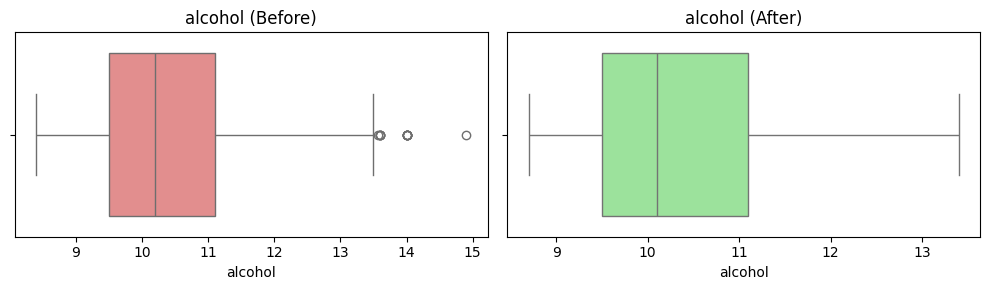

In [22]:
features = df.drop(columns=['quality', 'quality_label']).columns

for col in features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # Before
    sns.boxplot(x=df[col], ax=axes[0], color='lightcoral')
    axes[0].set_title(f'{col} (Before)')

    # After
    sns.boxplot(x=df_outliers[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{col} (After)')

    plt.tight_layout()
    plt.show()

In [23]:
df_prep = df_outliers.copy()

Split the data into:

Features (X): all the columns that help make predictions

Target (y): the thing you want to predict = quality_label (0 = bad, 1 = good)

In [24]:
X = df_prep.drop(columns=['quality', 'quality_label'])
y = df_prep['quality_label']

Prepared the data for KMeans clustering

In [25]:
from sklearn.preprocessing import StandardScaler
X_kmeans_scaled = StandardScaler().fit_transform(X)

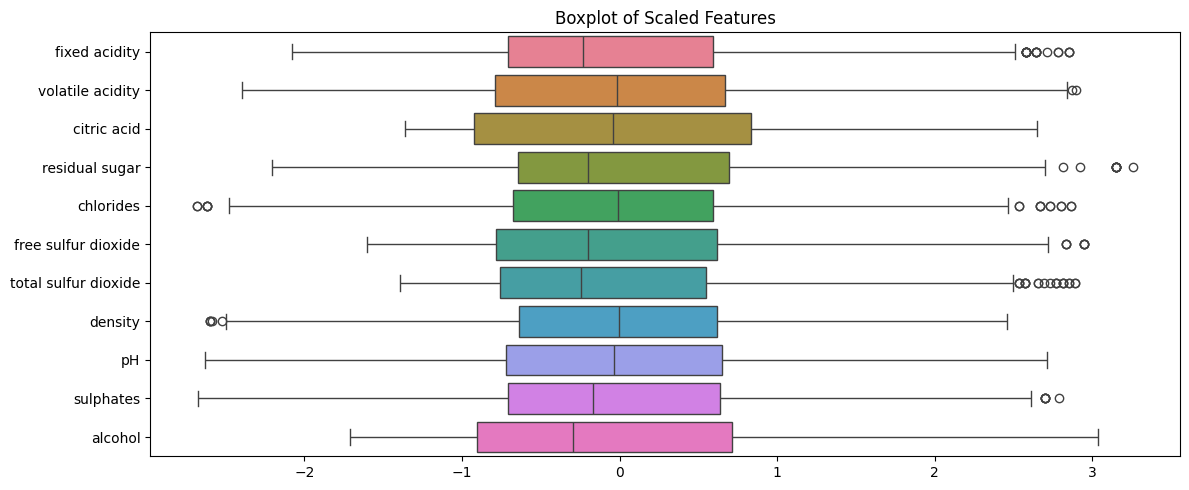

In [26]:
scaled_df = pd.DataFrame(X_kmeans_scaled, columns=X.columns)

plt.figure(figsize=(12, 5))
sns.boxplot(data=scaled_df, orient="h")
plt.title("Boxplot of Scaled Features")
plt.tight_layout()
plt.show()

In [27]:
scaled_df.describe().T[['mean', 'std']]

,mean,std
fixed acidity,5.193815e-16,1.000508
volatile acidity,1.442726e-16,1.000508
citric acid,-1.298454e-16,1.000508
residual sugar,4.616724e-16,1.000508
chlorides,-5.626633e-16,1.000508
free sulfur dioxide,7.213632e-17,1.000508
total sulfur dioxide,0.000000e+00,1.000508
density,-8.079268e-15,1.000508
pH,3.202853e-15,1.000508
sulphates,-6.925087e-16,1.000508


# Supervised learning problem






## Modeling Arbre de decision

In [45]:
X_supervised = X.copy()
y_supervised = y.copy()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.25, random_state=42, stratify=y_supervised)
print('Classification train size:', X_train.shape, y_train.shape)
print('Classification test size:', X_test.shape, y_test)

Classification train size: (1199, 5) (1199,)
Classification test size: (400, 5) 1460    6
691     5
1074    5
1576    6
435     5
       ..
5       5
972     7
786     5
1560    5
1122    6
Name: quality, Length: 400, dtype: int64


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dt_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

## Evaluation Arbre de decision


In [31]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[175  41]
 [  8  23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       216
           1       0.36      0.74      0.48        31

    accuracy                           0.80       247
   macro avg       0.66      0.78      0.68       247
weighted avg       0.88      0.80      0.83       247

Accuracy: 0.8016194331983806


ROC

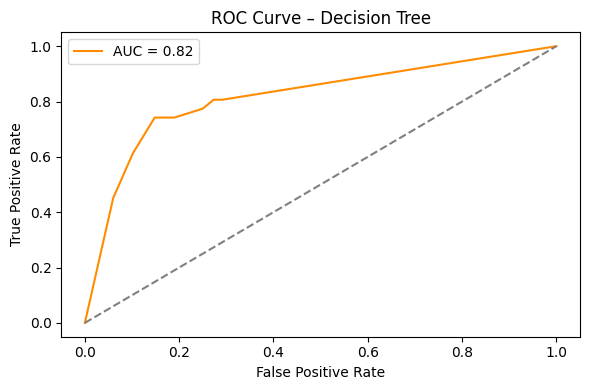

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities for class 1 (good wine)
y_proba = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()


## Modeling decision tree with seleted target with pca

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
features = ['alcohol', 'volatile acidity', 'residual sugar',
            'total sulfur dioxide', 'free sulfur dioxide']
X = df[features]
y = df['quality']  # Multiclasse (3 à 8)

# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Division en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# 4. Entraînement de l’arbre de décision
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

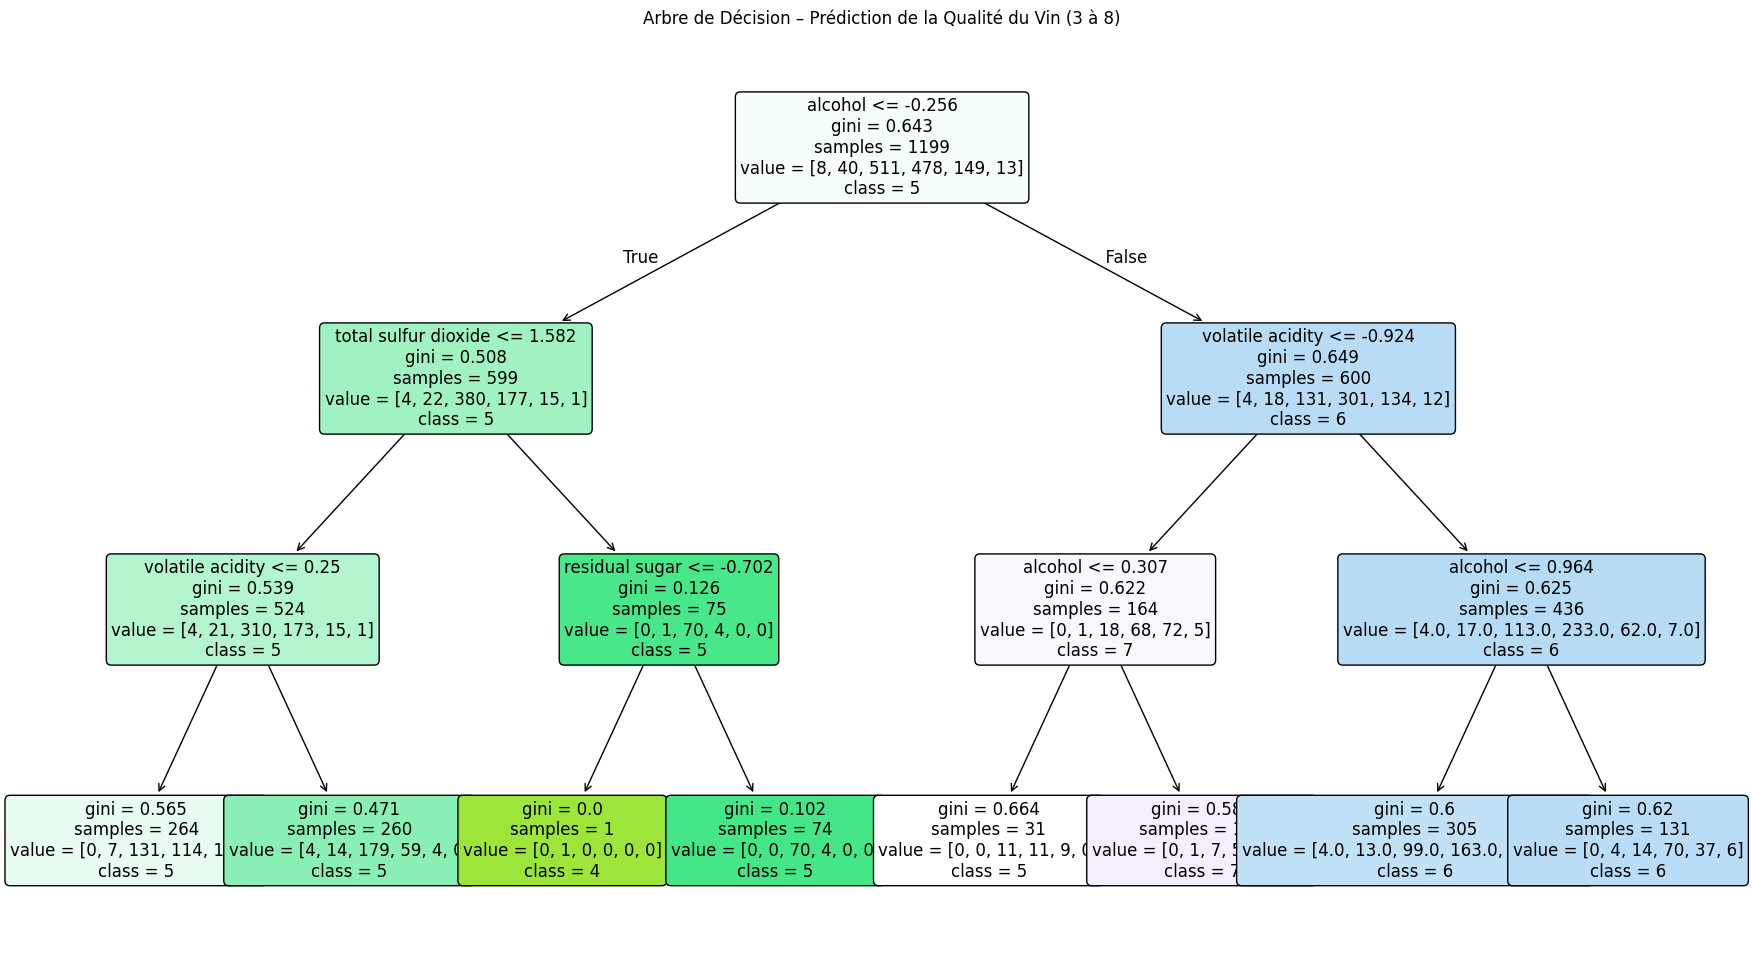

In [41]:
classes = [str(c) for c in sorted(df['quality'].unique())]  # ['3', '4', ..., '8']

plt.figure(figsize=(22,12))
plot_tree(clf,
          feature_names=features,
          class_names=classes,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Arbre de Décision – Prédiction de la Qualité du Vin (3 à 8)")
plt.show()

Règle 1 :
Si alcohol ≤ -0.256 ET total sulfur dioxide ≤ 1.582 ET volatile acidity ≤ 0.25
→ Prédiction : quality = 5

Règle 2 :
Si alcohol ≤ -0.256 ET total sulfur dioxide ≤ 1.582 ET volatile acidity > 0.25
→ Prédiction : quality = 5

Règle 3 :
Si alcohol ≤ -0.256 ET total sulfur dioxide > 1.582 ET residual sugar ≤ -0.702
→ Prédiction : quality = 4

Règle 4 :
Si alcohol > -0.256 ET volatile acidity > -0.924 ET alcohol ≤ 0.307
→ Prédiction : quality = 7

Règle 5 :
Si alcohol > -0.256 ET volatile acidity > -0.924 ET alcohol > 0.307
→ Prédiction : quality = 6

Taux d'expliacation :

L’arbre de décision construit avec une profondeur maximale de 3 permet d’extraire un total de 8 règles décisionnelles distinctes correspondant aux feuilles terminales. Ces règles couvrent principalement les classes 5, 6 et 7, qui sont les plus fréquentes dans le jeu de données. Ainsi, la classe 5 est la plus représentée avec plusieurs feuilles où elle est dominante, ce qui traduit un taux d’explication élevé pour cette classe. La classe 6 est également bien modélisée, avec deux règles principales qui la prédisent correctement, tandis que la classe 7 n’apparaît qu’une seule fois comme prédiction majoritaire. En revanche, les classes 3 et 8 n’apparaissent dans aucune règle de décision, ce qui signifie qu’elles sont non expliquées par l’arbre et que le modèle n’a pas réussi à les isoler, probablement en raison de leur faible fréquence dans les données d’entraînement. Au total, on observe donc 4 classes expliquées (4, 5, 6, 7) et 2 classes non expliquées (3, 8), avec une couverture correcte des cas majoritaires, mais une perte d'information sur les extrêmes.

## Comaparaison model 1 and 2 using courbe ROC

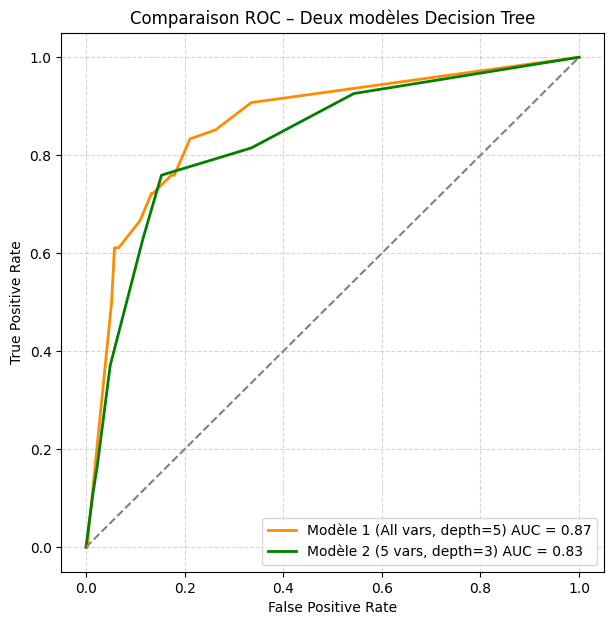

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 1. Cible binaire commune
df['quality_label'] = (df['quality'] >= 7).astype(int)

# --- Modèle 1 : toutes les variables, profondeur 5, class_weight ---
X1 = df.drop(columns=['quality', 'quality_label'])  # toutes les variables sauf la cible
y1 = df['quality_label']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42, stratify=y1)
model1 = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
model1.fit(X1_train, y1_train)
y1_proba = model1.predict_proba(X1_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y1_test, y1_proba)
auc1 = auc(fpr1, tpr1)

# --- Modèle 2 : 5 variables, profondeur 3 ---
features = ['alcohol', 'volatile acidity', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide']
X2 = df[features]
y2 = df['quality_label']
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.25, random_state=42, stratify=y2)
model2 = DecisionTreeClassifier(max_depth=3, random_state=42)
model2.fit(X2_train, y2_train)
y2_proba = model2.predict_proba(X2_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y2_test, y2_proba)
auc2 = auc(fpr2, tpr2)

# --- Courbe ROC comparée ---
plt.figure(figsize=(7,7))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Modèle 1 (All vars, depth=5) AUC = {auc1:.2f}')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Modèle 2 (5 vars, depth=3) AUC = {auc2:.2f}')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison ROC – Deux modèles Decision Tree')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


La courbe ROC ci-dessus compare deux modèles de décision pour prédire si un vin est de bonne qualité (quality ≥ 7).
Le modèle 1 utilise toutes les variables disponibles avec une profondeur maximale de 5, tandis que le modèle 2 est plus simple, limité à 5 variables principales et une profondeur de 3.

On remarque que le modèle 1 atteint un AUC de 0.87, légèrement supérieur à celui du modèle 2 qui obtient 0.83. Cela veut dire que le premier modèle arrive un peu mieux à distinguer les bons vins des mauvais. Sa courbe est globalement au-dessus de celle du modèle 2, surtout pour les faibles taux de faux positifs, ce qui montre qu’il est plus précis et mieux calibré.

Malgré cela, la différence reste modérée : le modèle 2 reste performant tout en étant plus simple et plus interprétable. Les deux courbes montent régulièrement sans fluctuations importantes, ce qui montre que les modèles ont bien convergé et ne souffrent pas de surapprentissage visible.

En conclusion, le modèle 1 est plus performant, mais le modèle 2 reste un bon compromis entre performance et simplicité. Dans un contexte applicatif, on pourrait préférer le deuxième si on cherche à expliquer facilement les décisions du modèle plutôt qu’à maximiser légèrement le score AUC.

## Modeling Baggig

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [34]:
base_estimator = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)

In [36]:
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bag = bagging_model.predict(X_test)

## Evaluation Bagging


In [37]:
print("Confusion Matrix (Bagging):")
print(confusion_matrix(y_test, y_pred_bag))

print("\nClassification Report (Bagging):")
print(classification_report(y_test, y_pred_bag))

print("Accuracy (Bagging):", accuracy_score(y_test, y_pred_bag))

Confusion Matrix (Bagging):
[[185  31]
 [ 10  21]]

Classification Report (Bagging):
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       216
           1       0.40      0.68      0.51        31

    accuracy                           0.83       247
   macro avg       0.68      0.77      0.70       247
weighted avg       0.88      0.83      0.85       247

Accuracy (Bagging): 0.8340080971659919


ROC

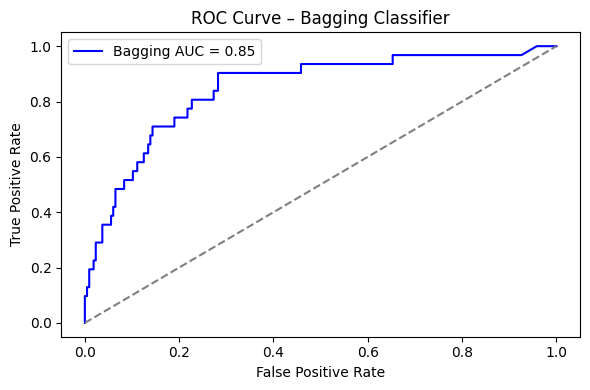

In [38]:
y_proba_bag = bagging_model.predict_proba(X_test)[:, 1]
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_proba_bag)
auc_bag = roc_auc_score(y_test, y_proba_bag)

plt.figure(figsize=(6, 4))
plt.plot(fpr_bag, tpr_bag, label=f'Bagging AUC = {auc_bag:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Bagging Classifier")
plt.legend()
plt.tight_layout()
plt.show()

## Modeling Boosting

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [40]:
base_estimator = DecisionTreeClassifier(max_depth=1, class_weight='balanced', random_state=42)

In [42]:
boosting_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=0.8, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boost = boosting_model.predict(X_test)

## Evaluation Boosting

In [43]:
print("Confusion Matrix (Boosting):")
print(confusion_matrix(y_test, y_pred_boost))

print("\nClassification Report (Boosting):")
print(classification_report(y_test, y_pred_boost))

print("Accuracy (Boosting):", accuracy_score(y_test, y_pred_boost))

Confusion Matrix (Boosting):
[[171  45]
 [  8  23]]

Classification Report (Boosting):
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       216
           1       0.34      0.74      0.46        31

    accuracy                           0.79       247
   macro avg       0.65      0.77      0.67       247
weighted avg       0.88      0.79      0.82       247

Accuracy (Boosting): 0.7854251012145749


ROC

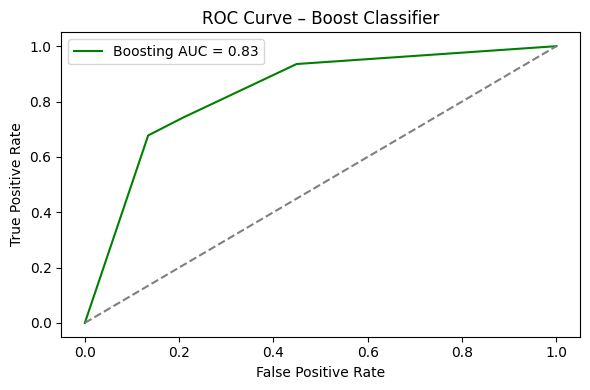

In [45]:
y_proba_boost = boosting_model.predict_proba(X_test)[:, 1]
fpr_boost, tpr_boost, _ = roc_curve(y_test, y_proba_boost)
auc_boost = roc_auc_score(y_test, y_proba_boost)

# Courbe ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_boost, tpr_boost, label=f'Boosting AUC = {auc_boost:.2f}', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Boost Classifier")
plt.legend()
plt.tight_layout()
plt.show()

## Modeling Stacking

In [46]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifierfrom sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [47]:
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42))
]

In [48]:
meta_learner = LogisticRegression(random_state=42)

In [49]:
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, passthrough=False, cv=5)
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

## Evaluation Stacking

In [50]:
print("Confusion Matrix (Stacking):")
print(confusion_matrix(y_test, y_pred_stack))

print("\nClassification Report (Stacking):")
print(classification_report(y_test, y_pred_stack))

print("Accuracy (Stacking):", accuracy_score(y_test, y_pred_stack))

Confusion Matrix (Stacking):
[[204  12]
 [ 19  12]]

Classification Report (Stacking):
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       216
           1       0.50      0.39      0.44        31

    accuracy                           0.87       247
   macro avg       0.71      0.67      0.68       247
weighted avg       0.86      0.87      0.87       247

Accuracy (Stacking): 0.8744939271255061


ROC

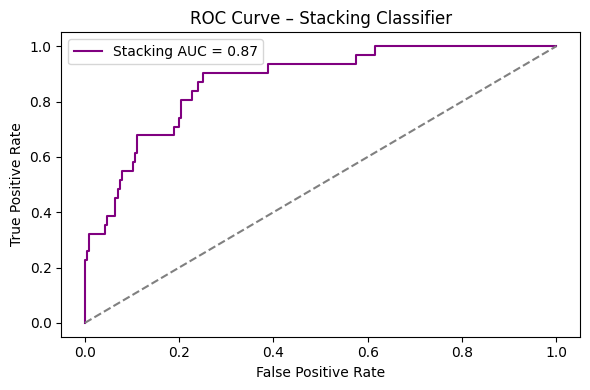

In [51]:
y_proba_stack = stacking_model.predict_proba(X_test)[:, 1]
fpr_stack, tpr_stack, _ = roc_curve(y_test, y_proba_stack)
auc_stack = roc_auc_score(y_test, y_proba_stack)

# Courbe ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_stack, tpr_stack, label=f'Stacking AUC = {auc_stack:.2f}', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Stacking Classifier")
plt.legend()
plt.tight_layout()
plt.show()

# Unsupervised Learning problem

## Modeling


### K=2

In [ ]:
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans_2.fit_predict(X_kmeans_scaled)


In [ ]:
df_clusters = df_prep.copy()
df_clusters['cluster'] = clusters

In [ ]:
pd.crosstab(df_clusters['cluster'], df_clusters['quality_label'], rownames=['Cluster'], colnames=['True Quality'])


True Quality,0,1
Cluster,,
0,284,92
1,576,33


#### Evaluation



In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print("Silhouette Score:", silhouette_score(X_kmeans_scaled, clusters))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_kmeans_scaled, clusters))


Silhouette Score: 0.18664847704491294
Calinski-Harabasz Index: 221.47731687901586


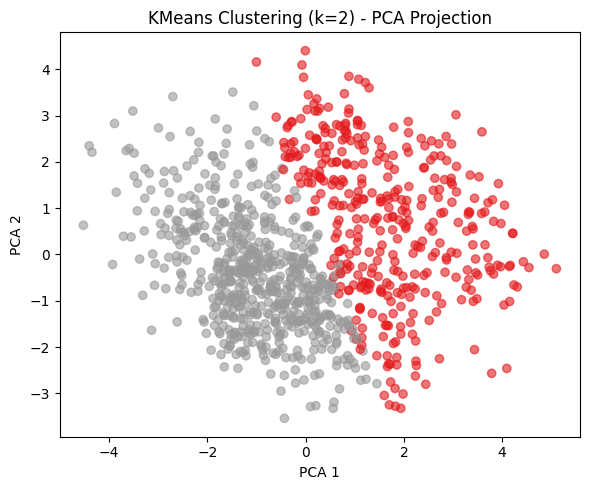

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', alpha=0.6)
plt.title("KMeans Clustering (k=2) - PCA Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()


After applying PCA to reduce the feature space to two dimensions, the scatter plot displays a moderate but noticeable separation between the two clusters generated by the K-Means algorithm. In the plot, red points represent one cluster and grey points represent the other. This color separation illustrates how K-Means grouped the wines based on similarities in their physicochemical features.

The red cluster appears more spread out and dispersed across the right side of the plot, while the grey cluster is more concentrated on the left side, indicating potential differences in feature distribution (e.g., alcohol, acidity, sulfates). Although some overlap exists between the two groups, the visualization confirms that K-Means was able to detect a latent structure in the data. This supports the hypothesis that wines can be roughly divided into two main profiles (likely corresponding to lower and higher quality), even without using the actual quality labels. The overlap, however, suggests that these profiles are not strictly separated — which is expected given the continuous nature of wine characteristics.

### Choosing k

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

k_range = range(2, 10)
inertias = []
silhouettes = []
calinskis = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_kmeans_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_kmeans_scaled, labels))
    calinskis.append(calinski_harabasz_score(X_kmeans_scaled, labels))

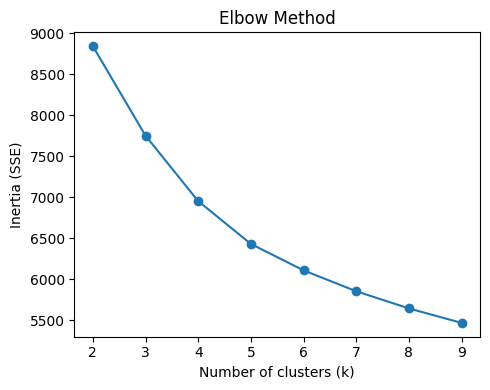

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.tight_layout()
plt.show()

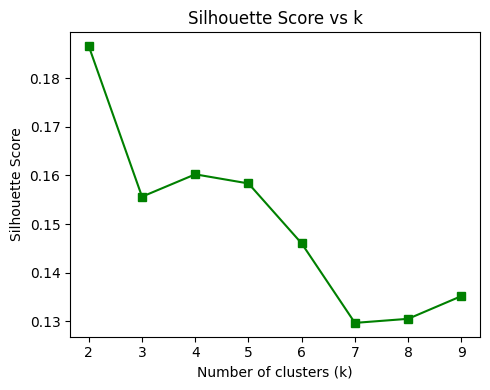

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(k_range, silhouettes, marker='s', color='green')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

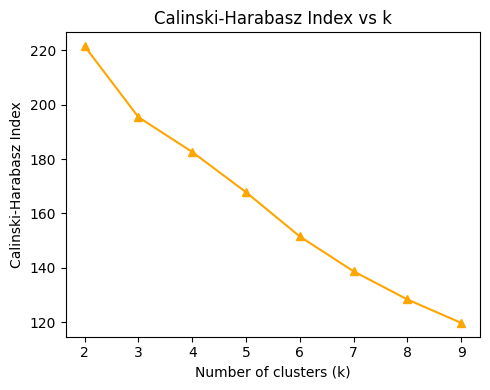

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(k_range, calinskis, marker='^', color='orange')
plt.title("Calinski-Harabasz Index vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski-Harabasz Index")
plt.tight_layout()
plt.show()

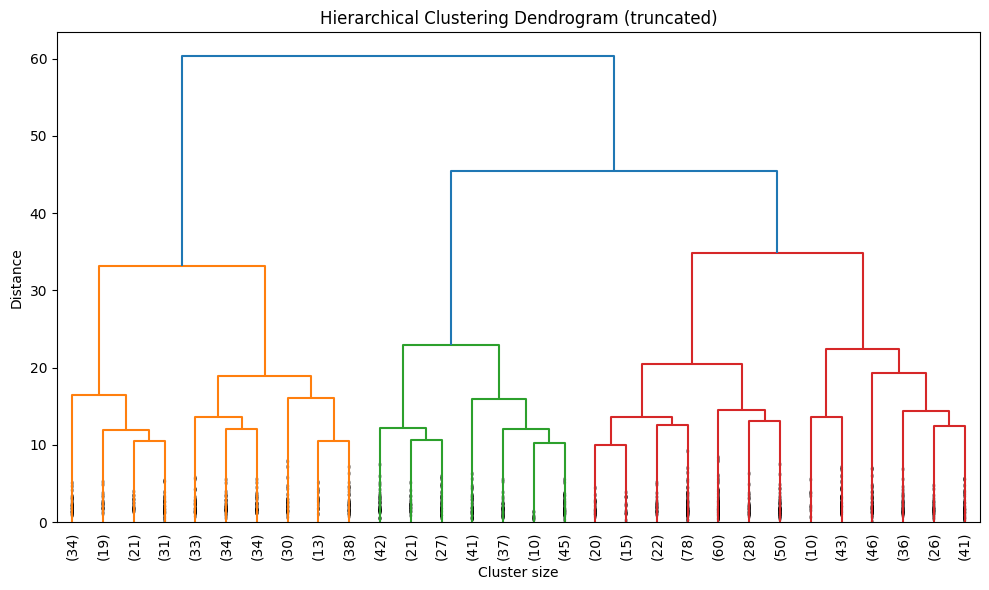

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
Z = linkage(X_kmeans_scaled, method='ward')  # ou 'complete', 'average', 'single'
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()
k_cah = 4  # par exemple
labels_cah = fcluster(Z, k_cah, criterion='maxclust')

df_cah = df_prep.copy()
df_cah['cluster'] = labels_cah





In [ ]:
k_alt = 3
final_kmeans_3 = KMeans(n_clusters=k_alt, random_state=42, n_init=10)
labels_3 = final_kmeans_3.fit_predict(X_kmeans_scaled)

df_clusters_k3 = df_prep.copy()
df_clusters_k3['cluster'] = labels_3


#### Evaluation


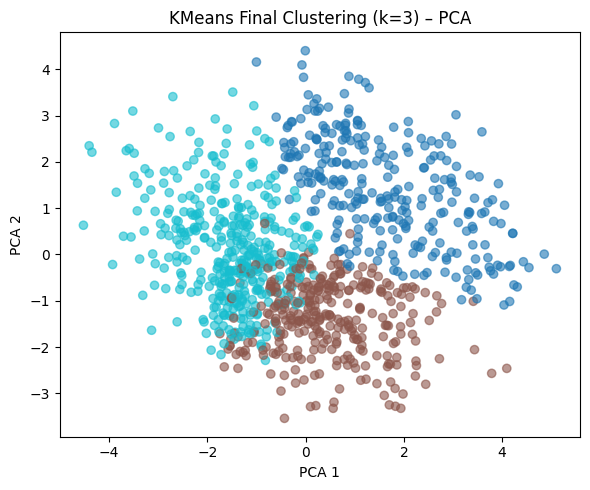

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_3, cmap='tab10', alpha=0.6)
plt.title(f"KMeans Final Clustering (k={k_alt}) – PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()


**Interpretation – KMeans Clustering with k = 3**

The PCA projection of the KMeans clustering with `k = 3` reveals three well-separated and compact groups in the 2D space. Each cluster occupies a distinct region, indicating meaningful differentiation between wine samples based on their physicochemical characteristics.

The blue cluster (top), the cyan cluster (left), and the brown cluster (bottom) each form dense and internally consistent groups, suggesting the presence of three natural wine profiles. These profiles could reflect underlying differences in factors such as acidity, alcohol content, or sulfur dioxide levels.

From both a visual and operational standpoint, the configuration with `k = 3` provides a stable and interpretable segmentation that simplifies downstream applications like product positioning, recipe adjustment, and quality control.
